In [1]:
import pandas as pd

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

import prepare
import model

In [2]:
# clean original dataset up to explore stage
df = prepare.prep_data(pd.read_csv('healthcare-dataset-stroke-data.csv'))
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65-70
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.6,never smoked,1,60-65
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,75-80


In [3]:
# encode, split, scale, SMOTE the explore-stage data
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.model_prep(df)
# check results
print('X_train with SMOTE:', X_train.shape)
print('y_train with SMOTE:', y_train.shape)
print('X_validate:', X_validate.shape)
print('y_validate:', y_validate.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Before SMOTE applied: (3065, 31) (3065,)
After SMOTE applied: (5812, 31) (5812,)
X_train with SMOTE: (5812, 31)
y_train with SMOTE: (5812,)
X_validate: (1022, 31)
y_validate: (1022,)
X_test: (1022, 31)
y_test: (1022,)


In [4]:
X_train # features like gender_Male and work_type_Private have non-ordinal values because of SMOTE oversampling

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,age_range_40-45,age_range_45-50,age_range_5-10,age_range_50-55,age_range_55-60,age_range_60-65,age_range_65-70,age_range_70-75,age_range_75-80,age_range_80-85
0,0.792480,0.0,0.0,0.415613,0.227662,1.000000,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.00000
1,0.951172,0.0,0.0,0.710322,0.258262,0.000000,1.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.00000
2,0.572754,0.0,0.0,0.253993,0.247246,1.000000,1.0,0.0,1.000000,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
3,0.682617,0.0,0.0,0.326609,0.175031,1.000000,1.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.00000
4,0.890137,0.0,0.0,0.065691,0.243574,0.000000,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,0.910190,0.0,0.0,0.209272,0.166422,1.000000,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.678623,0.321377,0.00000
5808,0.928368,1.0,0.0,0.084255,0.170208,0.000000,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.695440,0.000000,0.30456
5809,0.731440,0.0,1.0,0.722097,0.260709,0.749896,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.250104,0.749896,0.0,0.000000,0.000000,0.00000
5810,0.853516,0.0,1.0,0.123190,0.259796,0.000000,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.00000


In [5]:
# shotgun-out several classification models
y_train_predictions,\
y_validate_predictions = model.classification_shotgun(X_train, y_train, X_validate, y_validate)

In [6]:
# choose the baseline guess manually
y_train_predictions,\
y_validate_predictions = model.manual_baseline(y_train_predictions, y_validate_predictions, 1)

In [7]:
y_train_predictions # each model's predictions and the actuals column (in_actuals)

,in_actuals,baseline,tree_maxdepth1,tree_maxdepth2,tree_maxdepth3,tree_maxdepth5,tree_maxdepth10,rf_depth1,rf_depth2,rf_depth3,...,nb_vsmooth0.001,nb_vsmooth0.01,nb_vsmooth10,nb_vsmooth100,knn_n3,knn_n5,knn_n10,knn_n25,knn_n75,manual_baseline
0,0,0,1,1,1,1,0,1,1,1,...,1,1,1,1,0,0,0,0,1,1
1,0,0,1,1,1,1,0,1,1,1,...,1,1,1,1,0,0,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,1
4,0,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5808,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5809,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5810,1,0,1,1,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
# calculate accuracy and recall for in- and out-sample predictions
running_df = model.print_classification_results(y_train_predictions, y_validate_predictions)

In [9]:
# display accuracies and recalls for each model, sorting for best out-sample recall
running_df.sort_values(by=['OutSample_Recall','OutSample_Accuracy'], ascending=False)

,Model,InSample_Accuracy,OutSample_Accuracy,InSample_Recall,OutSample_Recall
14,nb_vsmooth1e-07,0.701136,0.449119,0.990021,1.000000
13,nb_vsmooth1e-08,0.691672,0.434442,0.990365,1.000000
12,nb_vsmooth1e-09,0.691156,0.432485,0.990709,1.000000
27,manual_baseline,0.500000,0.043053,1.000000,1.000000
3,tree_maxdepth3,0.813145,0.783757,0.879215,0.977273
1,tree_maxdepth1,0.787853,0.746575,0.868548,0.977273
2,tree_maxdepth2,0.787853,0.746575,0.868548,0.977273
19,nb_vsmooth0.01,0.747763,0.590020,0.945974,0.977273
18,nb_vsmooth0.001,0.748624,0.585127,0.955609,0.977273
17,nb_vsmooth0.0001,0.752409,0.582192,0.966621,0.977273


## ROC Curve
- A common way to compare models that predict probabilities for two-class problems is to use a ROC curve.
- ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
- It can be more flexible to predict the probabilities for each class instead of predicting the outcome itself. 
    * The reason for this is to provide the capability to choose and even **calibrate the threshold** for how to interpret the predicted probabilities.
     * For example, a default might be to use a threshold of 0.5, meaning that a probability in [0.0, 0.49] is a negative outcome (0) and a probability in [0.5, 1.0] is a positive outcome (1).

In [10]:
bl_probs = [0 for _ in range(len(y_train))]
tree = DecisionTreeClassifier(max_depth=3, random_state=123).fit(X_train, y_train)

In [11]:
# THRESHOLD = .60
# preds = np.where(tree.predict_proba(X_train) > THRESHOLD, 1, 0)
# tree_probs = preds[:, 1]
tree_probs = tree.predict_proba(X_train)
tree_probs = tree_probs[:, 1]

In [12]:
bl_auc = roc_auc_score(y_train, bl_probs)
tree_auc = roc_auc_score(y_train, tree_probs)

In [13]:
print('Baseline: ROC AUC=%.3f' % (bl_auc))
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

Baseline: ROC AUC=0.500
DecisionTreeClassifier: ROC AUC=0.872


In [14]:
bl_fpr, bl_tpr, _ = roc_curve(y_train, bl_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_train, tree_probs)
print("x axis:")
print(tree_fpr.round(5).tolist())
print("y axis:")
print(tree_tpr.round(5).tolist())

x axis:
[0.0, 0.0, 0.01824, 0.12251, 0.25292, 0.46869, 0.5086, 1.0]
y axis:
[0.0, 0.02099, 0.24054, 0.62801, 0.87922, 0.97213, 0.98245, 1.0]


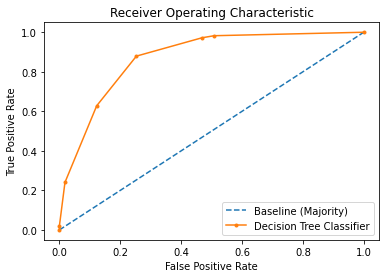

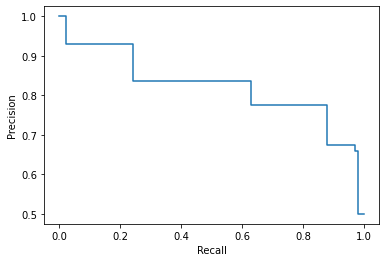

In [15]:
plt.plot(bl_fpr, bl_tpr, linestyle='--', label='Baseline (Majority)')
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()
# plot the precision-recall curve for the model
precision, recall, _ = precision_recall_curve(y_train, tree_probs)
disp = PrecisionRecallDisplay(precision = precision, recall = recall)
disp.plot()

## Titanic Example for implementing ROC Curve

In [16]:
# from seaborn import load_dataset
# from sklearn import svm
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

In [17]:
# # Import some data to play with
# titanic = load_dataset("titanic")
# titanic = titanic[['parch', 'sibsp','age', 'survived']].dropna()
# X = titanic.drop(columns=['survived'])
# y = titanic.survived

In [18]:
# # shuffle and split training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [19]:
# # get the majority class
# y_train.value_counts(normalize=True)

In [20]:
# # generate a baseline (majority class)
# bl_probs = [0 for _ in range(len(y_train))]
# # bl_probs[0:5]

In [21]:
# # fit classifier
# classifier = svm.SVC(kernel="linear", probability=True, random_state=123)
# classifier = classifier.fit(X_train, y_train)

In [22]:
# # get predicted probabilities
# THRESHOLD = .40
# preds = np.where(classifier.predict_proba(X_train) > THRESHOLD, 1, 0)
# # We want only the probability for the "true" outcome (1)
# # keep probablities for the positive outcome (the 1) only
# svc_probs = preds[:, 1]
# # svc_probs[0:5]

In [23]:
# # calculate scores
# bl_auc = roc_auc_score(y_train, bl_probs)
# svc_auc = roc_auc_score(y_train, svc_probs)

In [24]:
# # summarize scores
# print('Baseline: ROC AUC=%.3f' % (bl_auc))
# print('SVC: ROC AUC=%.3f' % (svc_auc))

In [25]:
# # calculate roc curves
# bl_fpr, bl_tpr, _ = roc_curve(y_train, bl_probs)
# svc_fpr, svc_tpr, _ = roc_curve(y_train, svc_probs)

In [26]:
# # plot the roc curve for the model
# import matplotlib.pyplot as plt
# plt.plot(bl_fpr, bl_tpr, linestyle='--', label='Baseline (Majority)')
# plt.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector Classifier')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Receiver Operating Characteristic")
# plt.legend(loc="lower right")
# plt.show()
# # plot the precision-recall curve for the model
# precision, recall, _ = precision_recall_curve(y_train, svc_probs)
# disp = PrecisionRecallDisplay(precision = precision, recall = recall)
# disp.plot()